<font color="#CA3532"><h1 align="left">Fundamentos de Análisis de Datos</h1></font>
<font color="#6E6E6E"><h2 align="left">Preprocesado de Datos con Python</h2></font>

## <font color="#CA3532">1. Inspección y auditoría de datos</font>

El primer paso siempre es mirar los datos y ver qué contienen. Algunas tareas típicas que se realizan durante esta etapa son calcular estadísticas descriptivas básicas y representar histogramas y diagramas de dispersión para diferentes pares de variables son .

Primero importamos las librerías *pandas* y *matplotlib*, establecemos el modo en línea *matplotlib* y establecemos el estilo de dibujo:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
pd.__version__

'0.24.2'

### <font color="#CA3532">Carga de datos con *pandas*</font>

Ahora cargaremos unos datos sencillos usando la función <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">pandas.read_csv</a>:

In [3]:
data = pd.read_csv("datasets/small.csv",
                   na_values = ["?", "none"], sep = ",")

Mostramos los datos que acabamos de leer:

In [4]:
data

,var1,var2,var3,var4,var5,var6
0,1,4.0,NaN,NaN,NaN,NaN
1,2,2.0,3.0,NaN,NaN,38.0
2,1,2.5,2.5,1.0,tc,39.0
3,2,3.5,1.5,0.0,tc,34.0
4,2,2.5,2.5,NaN,tc,39.0


In [5]:
data.dtypes

var1      int64
var2    float64
var3    float64
var4    float64
var5     object
var6    float64
dtype: object

Repetimos lo mismo pero ahora con ua base de datos más grande:

In [6]:
data = pd.read_csv("Datasets/adult.csv", na_values = ["?"], sep = ",")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### <font color="#CA3532">Estadísticas descriptivas</font>

Puedes sacar pon pantalla estadísticas descriptivas básicas usando el método <a  href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas-dataframe-describe"> pandas.DataFrame.describe</a>, tanto para variables numéricas:

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


como para variables categóricas:

In [9]:
data.describe(include = ["object"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Por cada variable se puede contar el número de repeticiones de cada valor con el método <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html#pandas-series-value-counts">pandas.Series.value_counts()</a>. Aunque esto se puede realizar tanto en atributos numéricos como categóricos, tiene mucho más sentido hacerlo en los categóricos:

In [10]:
data["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Podemos chequear ahora si hay alguna variable que presente valores ausentes (missing values):

In [11]:
data[.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
class             False
dtype: bool

Y contar cuántos missing values hay en cada variable:

In [12]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

### <font color="#CA3532">Visualización de los datos</font>

Finalmente podemos realizar diferentes tipos de gráficos para visualizar los datos.

Histogramas para datos numéricos:

In [13]:
import numpy as np
np.unique(data["capital-gain"])

array([    0,   114,   401,   594,   914,   991,  1055,  1086,  1111,
        1151,  1173,  1409,  1424,  1455,  1471,  1506,  1639,  1797,
        1831,  1848,  2009,  2036,  2050,  2062,  2105,  2174,  2176,
        2202,  2228,  2290,  2329,  2346,  2354,  2387,  2407,  2414,
        2463,  2538,  2580,  2597,  2635,  2653,  2829,  2885,  2907,
        2936,  2961,  2964,  2977,  2993,  3103,  3137,  3273,  3325,
        3411,  3418,  3432,  3456,  3464,  3471,  3674,  3781,  3818,
        3887,  3908,  3942,  4064,  4101,  4386,  4416,  4508,  4650,
        4687,  4787,  4865,  4931,  4934,  5013,  5060,  5178,  5455,
        5556,  5721,  6097,  6360,  6418,  6497,  6514,  6723,  6767,
        6849,  7298,  7430,  7443,  7688,  7896,  7978,  8614,  9386,
        9562, 10520, 10566, 10605, 11678, 13550, 14084, 14344, 15020,
       15024, 15831, 18481, 20051, 22040, 25124, 25236, 27828, 34095,
       41310, 99999], dtype=int64)

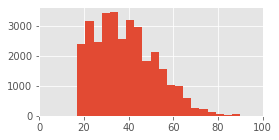

In [14]:
h = data["age"].hist(bins = 20, figsize = (4, 2)) # 4 ancho, 2 alto
plt.axis((0,100) + h.axis()[2:])
plt.show()

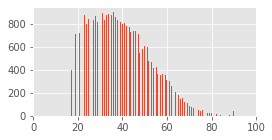

In [15]:
h = data["age"].hist(bins = 200, figsize = (4, 2)) # 4 ancho, 2 alto
plt.axis((0,100) + h.axis()[2:])
plt.show()

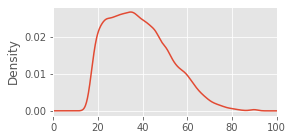

In [16]:
h = data["age"].plot.density(figsize = (4, 2))
plt.axis((0,100) + h.axis()[2:])
plt.show()

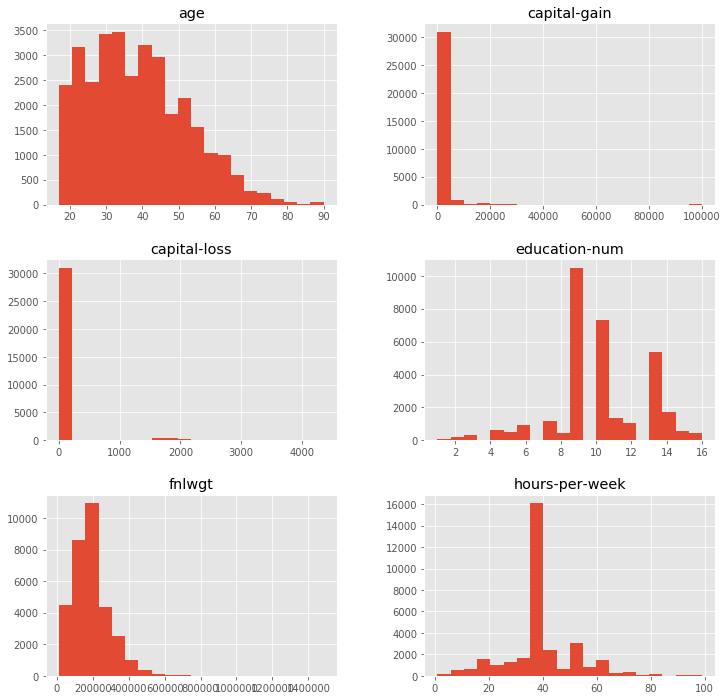

In [17]:
h = data.hist(bins = 20, figsize = (12, 12))

Y diagramas de barras o circulares (también conocidos como "diagramas de tarta") mostrando el número de repeticiones de cada valor en un atributo categórico:

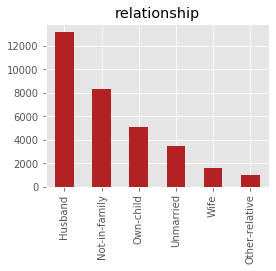

In [18]:
var = "relationship"
h = data[var].value_counts().plot(kind = 'bar', figsize = (4, 3),
                                  title = var, color = 'firebrick')

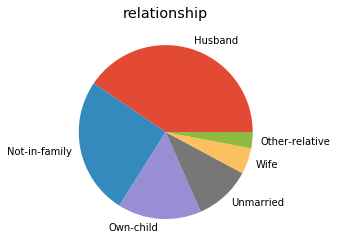

In [19]:
var = "relationship"
h = data[var].value_counts().plot(kind = 'pie', figsize = (4, 4), title = var).set_ylabel('')

Si queremos mostrar todos los gráficos circulares juntos podemos hacer:

In [20]:
data.dtypes == object

age               False
workclass          True
fnlwgt            False
education          True
education-num     False
marital-status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
class              True
dtype: bool

In [21]:
import numpy as np
categorical_data = data.loc[:, data.dtypes == object]

In [22]:
categorical_data.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [23]:
categorical_data.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')

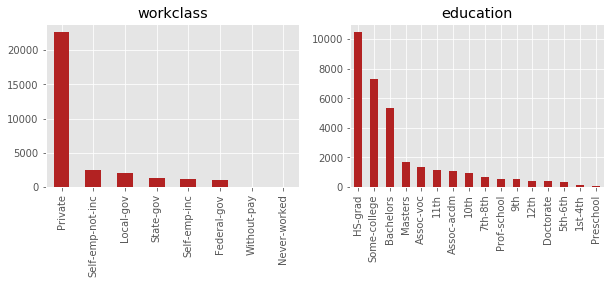

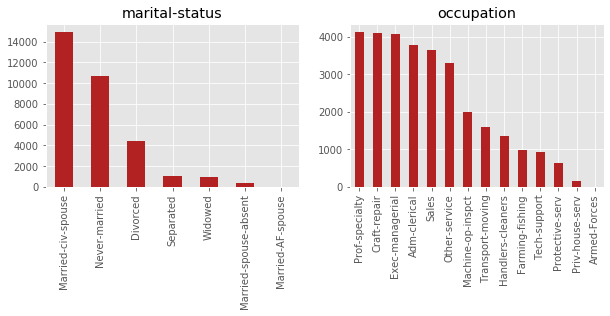

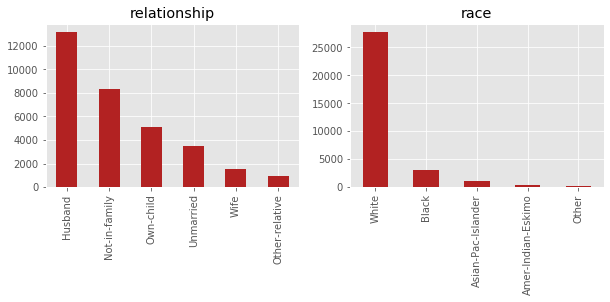

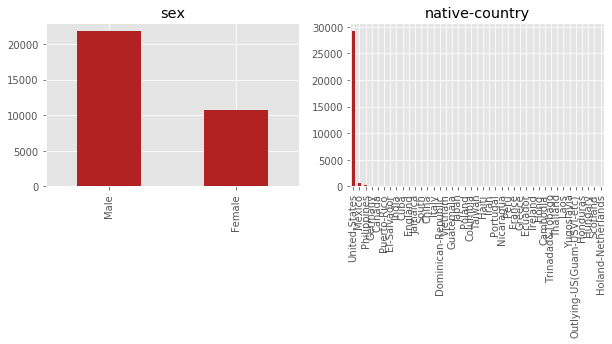

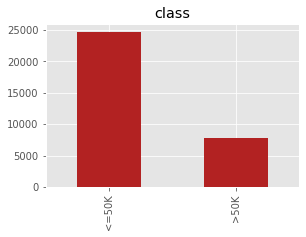

In [24]:
for i, var in enumerate(categorical_data.columns):
    if i%2 == 0:
        plt.figure(figsize=(10,3))
    # plt.subplot(num_filas, num_cols, num_figura_a_dibujar)
    plt.subplot(1,2,i%2+1)
    p = categorical_data[var].value_counts().plot(kind = 'bar', color='firebrick',
                                                  title = var)
    if i%2 == 1:
        plt.show()

** Diagramas de dispersión para datos numéricos: **

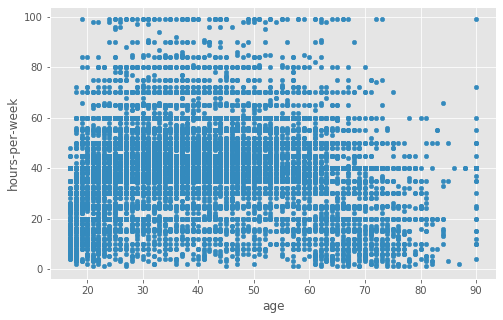

In [25]:
h = data.plot.scatter(x='age', y='hours-per-week',
                      figsize = (8, 5))

** Para que se vea mejor la estructura de la nube de puntos introducimos un factor alpha (transparencia): **

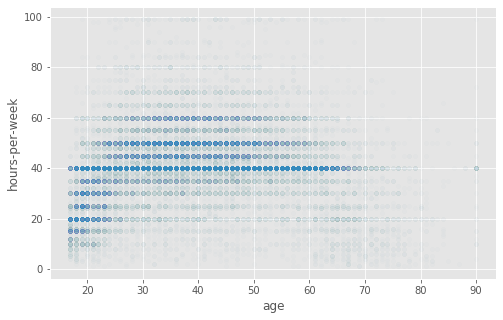

In [26]:
h = data.plot.scatter(x='age', y='hours-per-week', figsize = (8, 5),
                      alpha=0.01)

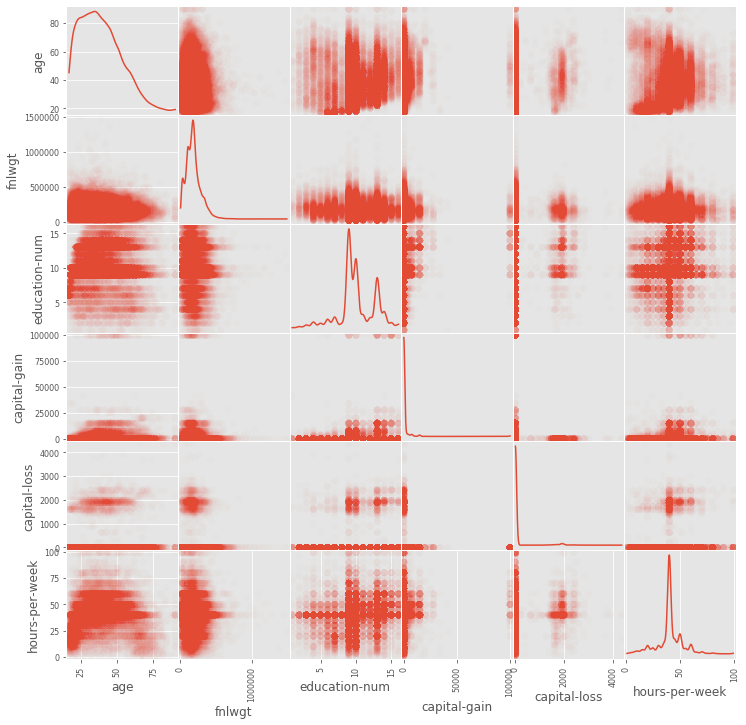

In [27]:
h = pd.plotting.scatter_matrix(data, alpha=0.01, figsize=(12, 12),
                               diagonal='kde', marker = 'o', s = 50)

**Y si ahora quiero distinguir los puntos de cada clase con colores:**

In [28]:
np.unique(data['class'])

array(['<=50K', '>50K'], dtype=object)

In [29]:
labels = data['class'] == '>50K'

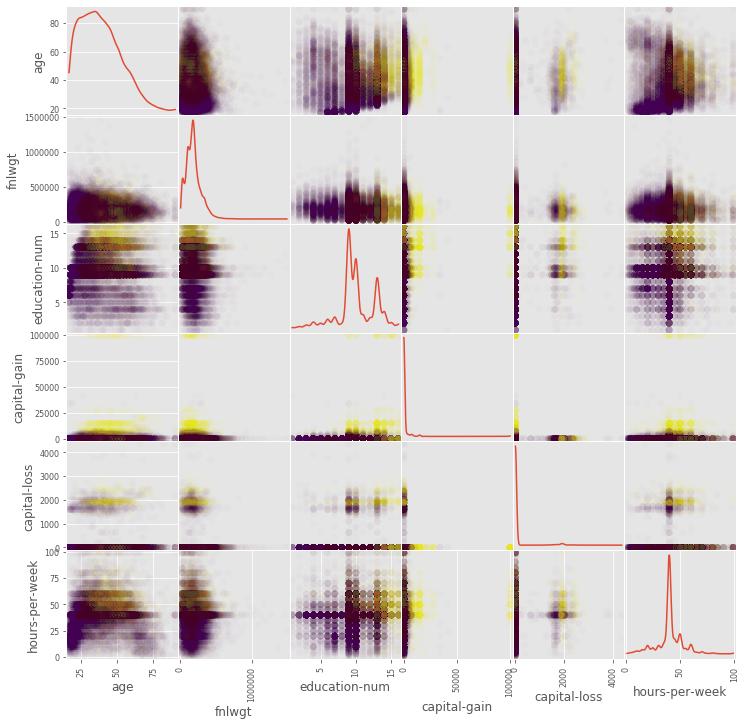

In [30]:
h = pd.plotting.scatter_matrix(data, alpha=0.01, figsize=(12, 12),
                               diagonal='kde', marker = 'o', s = 50,
                               c = labels)

Para más información sobre visualización usando *pandas*: https://pandas.pydata.org/pandas-docs/stable/visualization.html

### <font color="#CA3532">Ejercicio</font>

Carga la base de datos *loan* y explora los datos que contiene para tratar de resolver a las siguientes preguntas:

- ¿Cuántas instancias hay?  ¿y cuántos atributos?
- ¿Hay valores ausentes?
- ¿Hay otros valores que deberían ser tratados como missing?
- ¿Hay alguna variable que deberíamos descartar?
- ¿Hay alguna variable que debería transformarse?
- ¿Hay otros hechos relevantes que deberían ser comentados?